# **Data Science and Business Analytics (The Sparks Foundation May 21)**

**Task 1 : Predict Using Supervised ML**

**Author : Ridhima Rane**

**To predict the percentage of marks that a student is expected to score based upon the number of hours they studied**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# Reading and loading data from the remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Count the number of rows and columns in the data set
df.shape

(25, 2)

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum() 

Hours     0
Scores    0
dtype: int64

In [ ]:
#Look at the data types 
df.dtypes

Hours     float64
Scores      int64
dtype: object

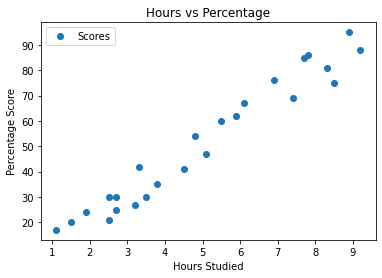

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


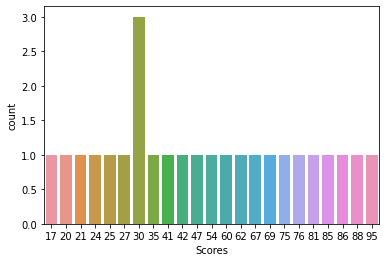

In [ ]:
#Visualize this count 
cp = sns.countplot(df['Scores'],label="Count")
cp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74410fd6d0>,
      dtype=object)

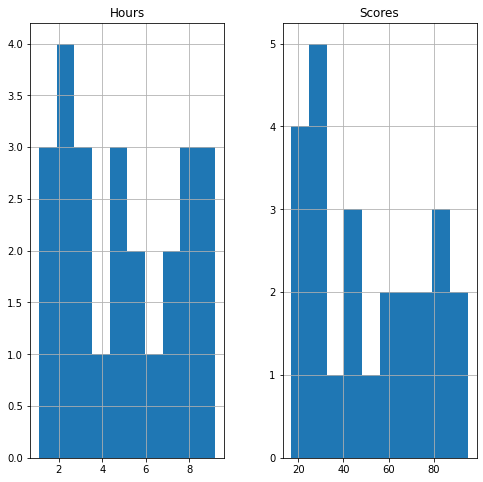

In [ ]:
df.hist(figsize=(8,8))

# **Get the Correlation**

In [ ]:
#Get the correlation of the columns
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


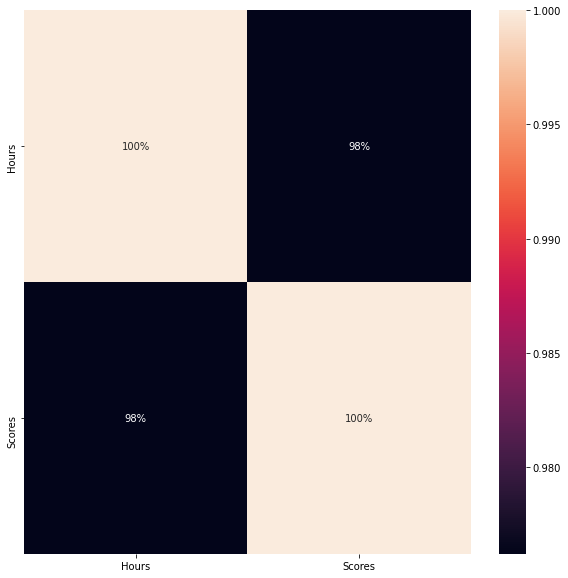

In [ ]:
# Visualize the correlation by creating a heat map.
plt.figure(figsize=(10,10))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

# **Data Processing**

In [ ]:
# splitting the data set into independent dataset (feature dataset) : X and dependent dataset (target dataset) : Y
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# **Algorithm Training**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression  
linear = LinearRegression()  
linear.fit(X_train, y_train) 

print("Training complete.")

Training complete.


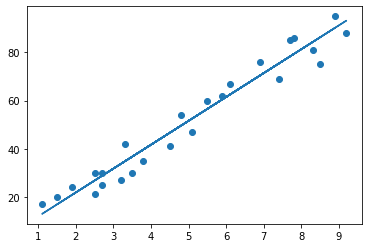

In [ ]:
# Plotting the regression line
line = linear.coef_*X+linear.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = linear.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# Testing Data
hours = 9.25
own_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
